In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

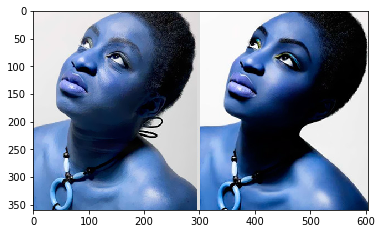

In [2]:
image = cv2.imread("pic.jpg")
image_out = np.zeros(image.shape, dtype=np.uint8)
plt.imshow(image)

In [3]:
image.shape

(360, 605, 3)

In [4]:
%%cython -a

def ela_slow(image, image_re, image_out):
    h = image.shape[0]
    w = image.shape[1]
    
    for y in range(0, h):
        for x in range(0, w):
        
            image_out[y, x, 0] = abs(image[y, x, 0] - image_re[y, x, 0])*10
            image_out[y, x, 1] = abs(image[y, x, 1] - image_re[y, x, 1])*10
            image_out[y, x, 2] = abs(image[y, x, 2] - image_re[y, x, 2])*10

    return image_out

ERROR:root:Cell magic `%%cython` not found.


In [5]:
%load_ext cython

In [6]:
%%cython -a
import cython

@cython.boundscheck(False)
cpdef unsigned char[:, :, :] ela_fast(unsigned char [:, :, :] image, unsigned char [:, :, :] image_re, unsigned char [:, :, :] image_out):
    
    cdef int x, y, w, h
    
    h = image.shape[0]
    w = image.shape[1]
    
    
    for y in range(0, h):
        for x in range(0, w):
            
            image_out[y, x, 0] = abs(image[y, x, 0] - image_re[y, x, 0])*10
            image_out[y, x, 1] = abs(image[y, x, 1] - image_re[y, x, 1])*10
            image_out[y, x, 2] = abs(image[y, x, 2] - image_re[y, x, 2])*10

    
    
    return image_out

DistutilsPlatformError: Unable to find vcvarsall.bat

In [7]:
image_orig = cv2.imread('pic.jpg')
cv2.imwrite('temp.jpg', image_orig, [cv2.IMWRITE_JPEG_QUALITY, 50])
image_re = cv2.imread("temp.jpg")


In [8]:
%timeit ela_fast(image, image_re, image_out)


NameError: name 'ela_fast' is not defined

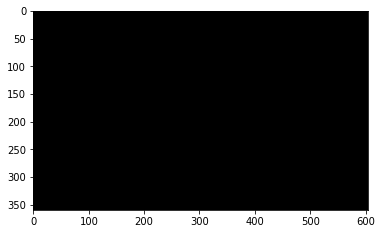

In [9]:
plt.imshow(image_out)


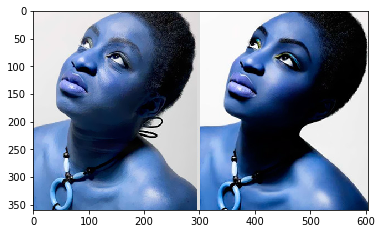

In [10]:
plt.imshow(image_orig)